In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("train_file.csv")
pred = pd.read_csv("test_file.csv")

In [38]:
len(pred)

26304

# Descriptive Analysis

In [39]:
df

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800
94988,94989,2018-12-31 20:00:00,2461.883600
94989,94990,2018-12-31 21:00:00,2365.994400
94990,94991,2018-12-31 22:00:00,2342.942800


In [40]:
# check the column types
df.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

In [41]:
# change the datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

In [42]:
# split the datetime into separate date and time for some analysis
df["date"] = df["datetime"].dt.date
df["date"] = pd.to_datetime(df['date'])
df["time"] = df["datetime"].dt.time
# split it further into years and months
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
# get a timestamp column
df["timestamp"] = pd.to_numeric(df["datetime"]) // 10**11

In [43]:
df.tail()

,row_id,datetime,energy,date,time,month,year,day,timestamp
94987,94988,2018-12-31 19:00:00,2528.4468,2018-12-31,19:00:00,12,2018,31,15462828
94988,94989,2018-12-31 20:00:00,2461.8836,2018-12-31,20:00:00,12,2018,31,15462864
94989,94990,2018-12-31 21:00:00,2365.9944,2018-12-31,21:00:00,12,2018,31,15462900
94990,94991,2018-12-31 22:00:00,2342.9428,2018-12-31,22:00:00,12,2018,31,15462936
94991,94992,2018-12-31 23:00:00,2180.2176,2018-12-31,23:00:00,12,2018,31,15462972


In [44]:
# check they column type again
df.dtypes

row_id                int64
datetime     datetime64[ns]
energy              float64
date         datetime64[ns]
time                 object
month                 int64
year                  int64
day                   int64
timestamp             int64
dtype: object

In [45]:
# get some basic descriptions about the energy column
df["energy"].describe()

count    93092.000000
mean      1702.995014
std        369.322103
min        866.388600
25%       1431.541100
50%       1654.465800
75%       1935.993450
max       3374.399600
Name: energy, dtype: float64

In [46]:
# replace the NaN energy values with the previous value
nan_energy = df.loc[df["energy"].isnull()].index
df["energy"].fillna(method='ffill', inplace=True)

In [47]:
pred

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00
...,...,...
26299,121292,2021-12-31 19:00:00
26300,121293,2021-12-31 20:00:00
26301,121294,2021-12-31 21:00:00
26302,121295,2021-12-31 22:00:00


In [48]:
# add a timestamp column to the pred set also
pred['datetime'] = pd.to_datetime(pred['datetime'])
pred["timestamp"] = pd.to_numeric(pred["datetime"]) // 10**11
pred.head()

,row_id,datetime,timestamp
0,94993,2019-01-01 00:00:00,15463008
1,94994,2019-01-01 01:00:00,15463044
2,94995,2019-01-01 02:00:00,15463080
3,94996,2019-01-01 03:00:00,15463116
4,94997,2019-01-01 04:00:00,15463152


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

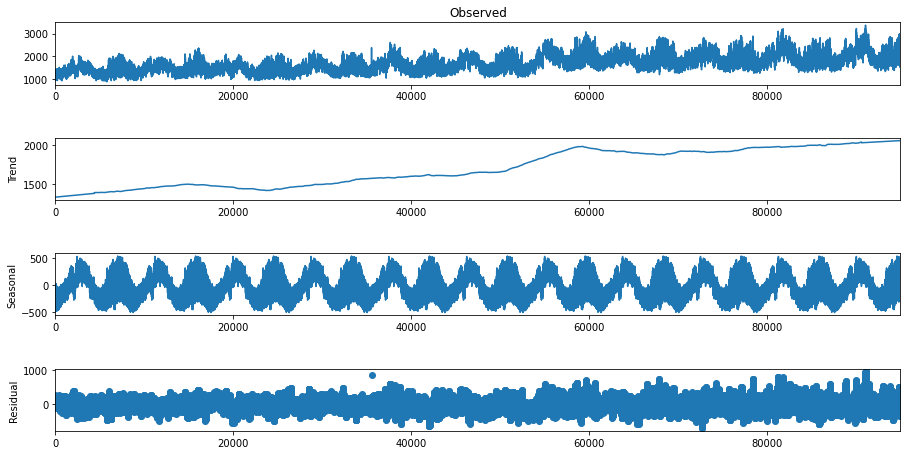

In [50]:
# decompose the data
from statsmodels.tsa.seasonal import seasonal_decompose

# graphs to show seasonal_decompose - hourly seasonality = 8760 periods approximately
def sd(y):
    decomposition = seasonal_decompose(np.asarray(y), period=8760, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
sd(df["energy"])

# Exploratory Data Analysis

Text(0.5, 1.0, 'Year vs Energy consumption')

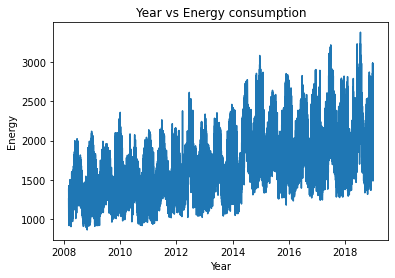

In [51]:
plt.plot(df['datetime'],df['energy'])
plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Year vs Energy consumption')

There is a linear increase in energy consumption over the years.

Could be because of increase in population, and other climactic factors like global warming.

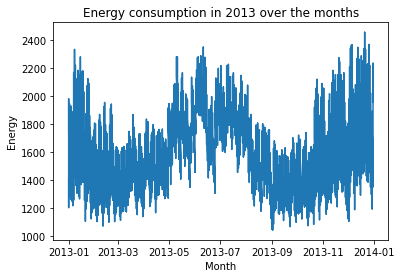

In [52]:
# check the trend of energy consumption over the months of a year
plt.plot(df["date"].loc[df['year']==2013],df["energy"].loc[df["year"]==2013])
plt.title("Energy consumption in 2013 over the months")
plt.xlabel('Month')
plt.ylabel('Energy')
plt.show()

The energy consumption is high early in the year, but dips slightly around March. It again increases from May until August, and dips again around September. It finally increases at the end of the year. 

It is cold in the beginning and end of the year, and the increase in consumption could be because of the continuous usage of heaters. The hot months in the middle of the year require air-conditioning too and more power.

Text(0.5, 0.98, 'Time of the day vs. Energy consuption - September to December, 2013')

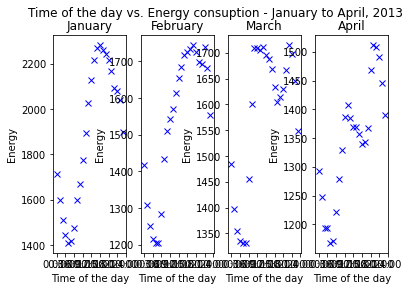

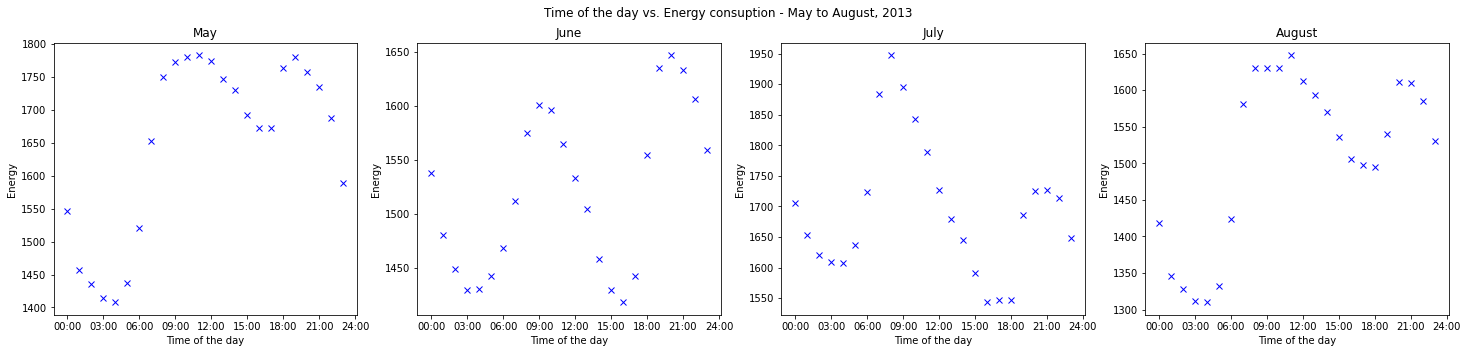

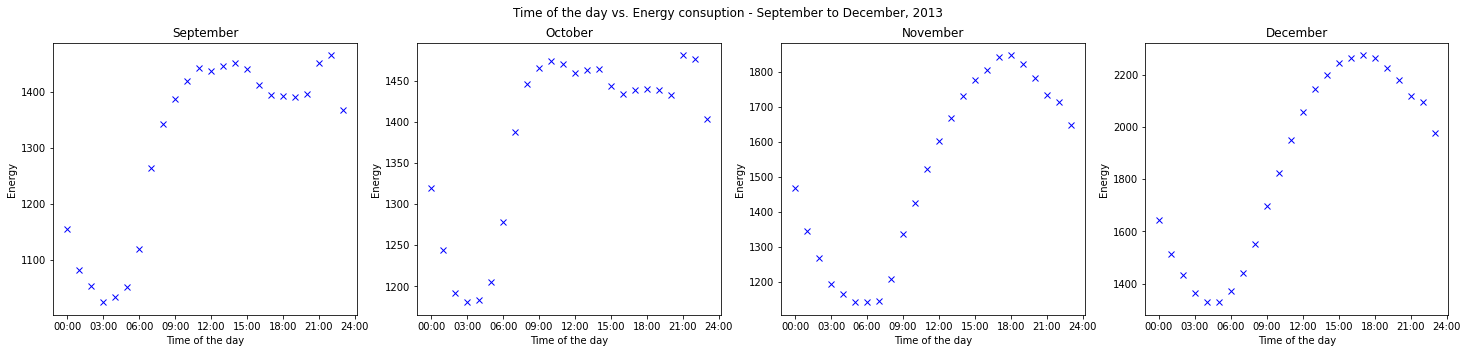

In [53]:
# randomly plot the energy trend of one day over each month for a particular year

# plot the first four months
fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [25,5]
labels = ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00']
axs[0].plot(df['datetime'].loc[df['date']=='2013-01-15'],df['energy'].loc[df['date']=='2013-01-15'], 'xb')
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('Time of the day')
axs[0].set_ylabel('Energy')
axs[0].set_title('January')
axs[1].plot(df['datetime'].loc[df['date']=='2013-02-15'],df['energy'].loc[df['date']=='2013-02-15'], 'xb')
axs[1].set_xticklabels(labels)
axs[1].set_xlabel('Time of the day')
axs[1].set_ylabel('Energy')
axs[1].set_title('February')
axs[2].plot(df['datetime'].loc[df['date']=='2013-03-15'],df['energy'].loc[df['date']=='2013-03-15'], 'xb')
axs[2].set_xticklabels(labels)
axs[2].set_xlabel('Time of the day')
axs[2].set_ylabel('Energy')
axs[2].set_title('March')
axs[3].plot(df['datetime'].loc[df['date']=='2013-04-15'],df['energy'].loc[df['date']=='2013-04-15'], 'xb')
axs[3].set_xticklabels(labels)
axs[3].set_xlabel('Time of the day')
axs[3].set_ylabel('Energy')
axs[3].set_title('April')
fig.suptitle('Time of the day vs. Energy consuption - January to April, 2013')

# plot the next four months
fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [25,5]
labels = ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00']
axs[0].plot(df['datetime'].loc[df['date']=='2009-05-15'],df['energy'].loc[df['date']=='2009-05-15'], 'xb')
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('Time of the day')
axs[0].set_ylabel('Energy')
axs[0].set_title('May')
axs[1].plot(df['datetime'].loc[df['date']=='2009-06-15'],df['energy'].loc[df['date']=='2009-06-15'], 'xb')
axs[1].set_xticklabels(labels)
axs[1].set_xlabel('Time of the day')
axs[1].set_ylabel('Energy')
axs[1].set_title('June')
axs[2].plot(df['datetime'].loc[df['date']=='2009-07-15'],df['energy'].loc[df['date']=='2009-07-15'], 'xb')
axs[2].set_xticklabels(labels)
axs[2].set_xlabel('Time of the day')
axs[2].set_ylabel('Energy')
axs[2].set_title('July')
axs[3].plot(df['datetime'].loc[df['date']=='2009-08-15'],df['energy'].loc[df['date']=='2009-08-15'], 'xb')
axs[3].set_xticklabels(labels)
axs[3].set_xlabel('Time of the day')
axs[3].set_ylabel('Energy')
axs[3].set_title('August')
fig.suptitle('Time of the day vs. Energy consuption - May to August, 2013')

# plot the last four months
fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [25,5]
labels = ['00:00','03:00','06:00','09:00','12:00','15:00','18:00','21:00','24:00']
axs[0].plot(df['datetime'].loc[df['date']=='2009-09-15'],df['energy'].loc[df['date']=='2009-09-15'], 'xb')
axs[0].set_xticklabels(labels)
axs[0].set_xlabel('Time of the day')
axs[0].set_ylabel('Energy')
axs[0].set_title('September')
axs[1].plot(df['datetime'].loc[df['date']=='2009-10-15'],df['energy'].loc[df['date']=='2009-10-15'], 'xb')
axs[1].set_xticklabels(labels)
axs[1].set_xlabel('Time of the day')
axs[1].set_ylabel('Energy')
axs[1].set_title('October')
axs[2].plot(df['datetime'].loc[df['date']=='2009-11-15'],df['energy'].loc[df['date']=='2009-11-15'], 'xb')
axs[2].set_xticklabels(labels)
axs[2].set_xlabel('Time of the day')
axs[2].set_ylabel('Energy')
axs[2].set_title('November')
axs[3].plot(df['datetime'].loc[df['date']=='2009-12-15'],df['energy'].loc[df['date']=='2009-12-15'], 'xb')
axs[3].set_xticklabels(labels)
axs[3].set_xlabel('Time of the day')
axs[3].set_ylabel('Energy')
axs[3].set_title('December')
fig.suptitle('Time of the day vs. Energy consuption - September to December, 2013')

Generally, the energy consumption is lowest in the range 3 am to 6 am, and highest in the evenings/night - could be because of the decreased usage of appliances and light sources, etc at night.

January - trend is pretty smooth\
February - also smooth except for a few bumps\
March - energy consumption is high in the morning in addition to late at night\
April - consumption insreases in the late morning, but is highest at night\
May - consumption is high again in late mornings in addition to night\
June - there is a peak in the morning, and a downwards dip in early evening\
July - the highest consumption is in the early morning. Night consumption is less\
August - similar to July, but night consumption is more then July\
September - late afternoon and night consumption are comparable\
October - similar to September\
November - smooth trend\
December - smooth trend

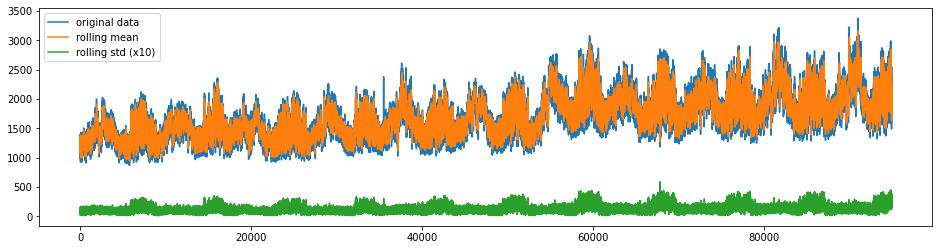

In [54]:
# check the stationarity of the data using rolling statistics

def stationary(data):
    
    rolling_mean = pd.Series(data).rolling(window=12).mean() 
    rolling_std = pd.Series(data).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(data, label='original data')
    ax.plot(rolling_mean, label='rolling mean');
    ax.plot(rolling_std, label='rolling std (x10)');
    ax.legend()
stationary(df["energy"])

In [55]:
# double check the stationarity using ADS test
from statsmodels.tsa.stattools import adfuller

def adf(data):
    dftest = adfuller(data.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('p-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
adf(df["energy"])

Test statistic = -9.219
p-value = 0.000
Critical values :
	1%: -3.4304188917117377 - The data is  stationary with 99% confidence
	5%: -2.8615704490393217 - The data is  stationary with 95% confidence
	10%: -2.5667862069612752 - The data is  stationary with 90% confidence


The data is stationary.

# Predictions

We have a seasonal data with an upwards trend.

In [56]:
# make a cross-validation set to get the evaluation metrics
cross = df.loc[df["year"] >= 2016]
train = df.loc[df["year"] < 2016 ]

In [57]:
x_train = np.asanyarray(train["timestamp"])
y_train = np.asanyarray(train["energy"])

x_cross = np.asanyarray(cross["timestamp"])
y_cross = np.asanyarray(cross["energy"])

x_test = np.asanyarray(pred["timestamp"])

## Holt-Winter's Seasonal Method

### Model

In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


The Root Mean Squared Error is 366.1


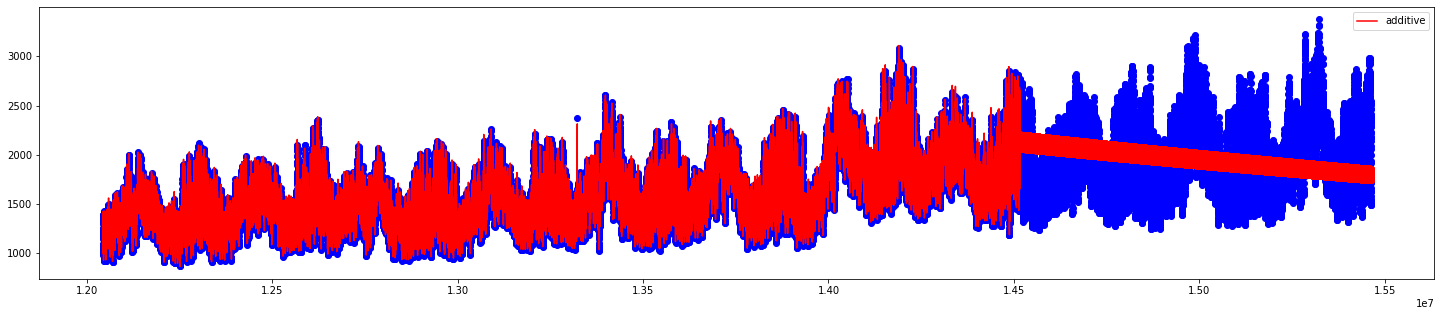

In [60]:
def hws(y,y_train,y_cross,number):
    
    plt.plot(df["timestamp"],y,'ob')
    
    fit1 = ExponentialSmoothing(y_train, seasonal_periods = 12, trend='add', seasonal='add').fit(use_boxcox=True)
    fcast1 = fit1.forecast(number)
    mse1 = ((fcast1 - y_cross) ** 2).mean()
    print('The Root Mean Squared Error is', round(np.sqrt(mse1), 2))
        
    plt.plot(x_train,fit1.fittedvalues,'-r',label='additive')
    plt.plot(x_cross,fcast1,'or')
    plt.legend()
    plt.show()
hws(df["energy"],y_train,y_cross,len(x_cross))

### Prediction

In [61]:
fit = ExponentialSmoothing(df["energy"], seasonal_periods = 12, trend='add', seasonal='add').fit(use_boxcox=True)
prediction = fit.forecast(len(x_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [62]:
p = prediction.to_list()

In [63]:
pred["energy"] = p

In [65]:
pred.drop(['timestamp','datetime'], axis=1, inplace=True)

In [66]:
pred

,row_id,energy
0,94993,2155.893596
1,94994,2118.651593
2,94995,2093.706866
3,94996,2074.333344
4,94997,2056.928030
...,...,...
26299,121292,2416.048481
26300,121293,2430.553972
26301,121294,2463.630008
26302,121295,2528.874179


In [68]:
pred.to_csv("final_submission.csv", index=False)

-------------------------------------------------